In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [21]:
# Создание модели
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Загрузка и предобработка изображений для обучения
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/weapons_for_training', target_size=(224, 224), batch_size=32, class_mode='binary')

# Обучение модели
model.fit(train_data, epochs=10)

# Сохранение модели
model.save('weapon_detection_model.h5')

Found 2043 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


64/64 [==============================] - 19s 215ms/step - loss: 0.2254 - accuracy: 0.9325
Epoch 2/10
64/64 [==============================] - 14s 217ms/step - loss: 0.0516 - accuracy: 0.9824
Epoch 3/10
64/64 [==============================] - 14s 223ms/step - loss: 0.0253 - accuracy: 0.9892
Epoch 4/10
64/64 [==============================] - 14s 220ms/step - loss: 0.0140 - accuracy: 0.9956
Epoch 5/10
64/64 [==============================] - 14s 219ms/step - loss: 0.0185 - accuracy: 0.9941
Epoch 6/10
64/64 [==============================] - 14s 220ms/step - loss: 6.4150e-04 - accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 14s 222ms/step - loss: 7.5059e-04 - accuracy: 1.0000
Epoch 8/10
64/64 [==============================] - 14s 220ms/step - loss: 2.2594e-04 - accuracy: 1.0000
Epoch 9/10
64/64 [==============================] - 14s 216ms/step - loss: 6.8259e-05 - accuracy: 1.0000
Epoch 10/10
64/64 [==============================] - 14s 218ms/step - loss: 2.6796e-05

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 130ms/step


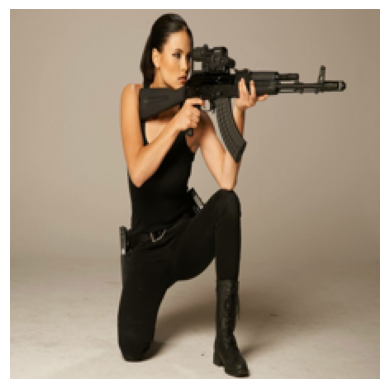

[[0.9998084]]
На изображении есть оружие


In [55]:
# Загрузка модели
model = tf.keras.models.load_model('weapon_detection_model.h5')

# Загрузка изображения
image_path = '/content/drive/MyDrive/dataset/test/girl_with_gun.jpg'
image = Image.open(image_path)
image = image.resize((224, 224))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array /= 255.0
prediction = model.predict(image_array)
plt.imshow(image_array[0])
plt.axis('off')
plt.show()

# Вывод результата
print(prediction)
if prediction <= 0.5:
    print('На изображении нет оружия')
else:
    print('На изображении есть оружие')